<a href="https://colab.research.google.com/github/laveena-majeed/-Customer-Analysis-Predictive-Insights-and-Clustering-/blob/main/Original_%F0%9F%8E%AF_Customer_Analysis_Predictive_Insights_and_Clustering_%F0%9F%93%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Analysis Project: Unlocking Insights for Marketing Success**

Welcome to the Customer Analysis project! 🚀 In this interactive notebook, we'll embark on a data science journey to unravel the mysteries of customer behavior and empower a well-known company with actionable insights for their marketing campaigns.

## 📊 Project Overview

Imagine you're a data scientist at a renowned company, tasked with deciphering customer behavior patterns. Your mission? To predict whether customers will accept the company's marketing campaigns and segment them into distinct groups. Armed with data science techniques, we'll explore, visualize, and model the dataset to uncover hidden gems that can revolutionize the company's marketing strategies.

## 🛠️ Tools and Techniques

We'll harness the power of Python and essential data science libraries like Pandas, NumPy, Matplotlib, and Scikit-learn to analyze, preprocess, model, and visualize the data. From Exploratory Data Analysis (EDA) to machine learning algorithms, we'll employ a diverse toolkit to extract meaningful insights from the data.

## 📚 Dataset Description

Our dataset provides a rich tapestry of customer attributes, including demographic information, purchase history, campaign responses, and more. By delving into this treasure trove of data, we'll uncover fascinating insights that can drive informed decisions and propel the company towards marketing excellence.

## 🚀 Let's Get Started!

Are you ready to dive into the world of customer analysis? Let's roll up our sleeves, fire up our code editor, and embark on an exhilarating journey to unlock the secrets of customer behavior!





# **Importing Libraries**

In [ ]:
# Data manipulation
import pandas as pd  # For handling data in DataFrame format
import numpy as np   # For numerical computations
import openpyxl
# Data visualization
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns            # For enhanced data visualization

# Machine learning for classification
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import StandardScaler, LabelEncoder      # For data preprocessing
from sklearn.pipeline import Pipeline                              # For building data preprocessing pipelines
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation
from sklearn.linear_model import LogisticRegression                # For logistic regression classification
from sklearn.ensemble import RandomForestClassifier                # For random forest classification

# Machine learning for clustering
from sklearn.cluster import KMeans  # For KMeans clustering




# **Loading the data**

In [ ]:
data = pd.read_csv("/content/customer_train.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 1680


,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0





### About the Dataset

The dataset contains information about customers and their interactions with the company. Here's a breakdown of the key features:

#### People
- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in the customer's household
- **Teenhome**: Number of teenagers in the customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since the customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- **MntWines**: Amount spent on wine in the last 2 years
- **MntFruits**: Amount spent on fruits in the last 2 years
- **MntMeatProducts**: Amount spent on meat in the last 2 years
- **MntFishProducts**: Amount spent on fish in the last 2 years
- **MntSweetProducts**: Amount spent on sweets in the last 2 years
- **MntGoldProds**: Amount spent on gold in the last 2 years

#### Promotion
- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month


#  **Data Cleaning**

During the data cleaning phase, we'll ensure that the dataset is accurate and ready for analysis. Here's what we'll do:

1. **Handling Missing Values**:
   - Identify and fill missing values in the dataset.

2. **Dealing with Outliers**:
   - Detect and address outliers in the data.

3. **Data Validation**:
   - Check for inconsistencies and validate the data.

4. **Feature Encoding**:
   - Convert categorical variables into numerical format for analysis.

In [ ]:
 #Information on features
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [ ]:
import pandas as pd

# Convert 'Marital_Status' column to category data type
data['Marital_Status'] = data['Marital_Status'].astype('category')

# Convert 'Kidhome' column to object data type (assuming you want to convert it to a string)
data['Kidhome'] = data['Kidhome'].astype(str)




In [ ]:
# Convert columns to integer data type
data["Kidhome"] = data["Kidhome"].astype(int)
data["Teenhome"] = data["Teenhome"].astype(int)

# Now you can safely perform the addition operation
data["Children"] = data["Kidhome"] + data["Teenhome"]


## Observations

From the initial exploration of the dataset, we can conclude the following:

1. **Missing Values**: The 'Income' column contains missing values that need to be addressed during data preprocessing.

2. **Date Parsing**: The 'Dt_Customer' column, which indicates the date a customer joined the database, is not parsed as DateTime. We'll need to convert it into DateTime format for further analysis.

3. **Categorical Features**: Some features in the dataset are categorical (dtype: object). These categorical variables will need to be encoded into numerical forms later in the data preprocessing stage.

### Handling Missing Values

To address missing values in the 'Income' column, we'll drop the rows that have missing income values. Here's our approach:

1. **Drop Rows with Missing Income Values**:
   - Identify rows where the 'Income' column has missing values.
   - Drop these rows from the dataset to ensure data integrity.

In [ ]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 1663


## Feature Engineering

### Creating New Feature from 'Dt_Customer'

To create a feature indicating the number of days each customer has been registered in the firm's database, we'll follow these steps:

1. **Find the Most Recent and Oldest Recorded Dates**:
   - Identify the newest and oldest recorded dates in the 'Dt_Customer' column.

2. **Calculate Number of Days Registered**:
   - Calculate the number of days each customer has been registered relative to the most recent recorded date.
   - This will provide a measure of the duration of customer registration in the database.



In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-05
The oldest customer's enrolment date in the records: 2012-01-08


<ipython-input-320-627b1cd2d108>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
<ipython-input-320-627b1cd2d108>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


## Feature Engineering

### Creating New Feature "Customer_For"

To create a feature indicating the number of days each customer started shopping in the store relative to the last recorded date, we'll follow these steps:

1. **Find the Last Recorded Date**:
   - Identify the last recorded date in the dataset.

2. **Calculate Number of Days Since Customer Started Shopping**:
   - Calculate the number of days each customer has been shopping in the store relative to the last recorded date.
   - This will provide a measure of the duration since each customer started shopping in the store.



In [ ]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

<ipython-input-321-773b3d3748ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = days
<ipython-input-321-773b3d3748ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")


### Value Mapping for Categorical Encoding

Value mapping, also known as categorical encoding, is a technique used to replace existing categorical values in a column with new values based on a predefined mapping dictionary.

In the provided code snippet:

- **Mapping Dictionaries:** Two dictionaries (`marital_status_mapping` and `education_mapping`) are defined, mapping original categorical values to new ones.
  
- **Replace Method:** The `replace()` method of pandas DataFrame is utilized to replace existing categorical values in the "Marital_Status" and "Education" columns with the new values specified in the mapping dictionaries.

This technique ensures consistency in categorical data representation and enables mapping to more meaningful or standardized labels. It's commonly applied in data preprocessing tasks to enhance interpretability and facilitate modeling.


In [ ]:
# Define mapping dictionaries for Marital_Status and Education
marital_status_mapping = {
    'Menikah': 'Married',
    'Bertunangan': 'Engaged',
    'Lajang': 'Single',
    'Cerai': 'Divorced',
    'Janda': 'Widowed',
    'Duda': 'Widower'
}

education_mapping = {
    'S1': 'Bachelor',
    'S2': 'Master',
    'S3': 'Doctorate',
    'D3': 'Diploma',
    'SMA': 'High School'
}

# Replace categorical names using mapping dictionaries
data['Marital_Status'] = data['Marital_Status'].replace(marital_status_mapping)
data['Education'] = data['Education'].replace(education_mapping)


<ipython-input-322-e8402ba71f17>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Marital_Status'] = data['Marital_Status'].replace(marital_status_mapping)
<ipython-input-322-e8402ba71f17>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education'] = data['Education'].replace(education_mapping)


In [ ]:
data['Marital_Status'].head()

0     Single
1     Single
2    Engaged
3    Engaged
4    Married
Name: Marital_Status, dtype: category
Categories (6, object): ['Engaged', 'Divorced', 'Widower', 'Widowed', 'Single', 'Married']

In [ ]:
data['Education'].head()

0     Bachelor
1     Bachelor
2     Bachelor
3     Bachelor
4    Doctorate
Name: Education, dtype: object

## Exploring Categorical Features

To gain insight into the categorical features and understand the diversity of the data, we'll explore the unique values in each categorical feature. Here's our approach:

1. **Education Level**:
   - Identify unique education levels present in the dataset.

2. **Marital Status**:
   - Explore the unique marital status categories.


In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())


Total categories in the feature Marital_Status:
 Married     644
Engaged     434
Single      353
Divorced    177
Widowed      52
Widower       3
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Bachelor       825
Doctorate      369
Master         277
Diploma        157
High School     35
Name: Education, dtype: int64


## Feature Engineering

### Age Calculation

The age of each customer is calculated based on their birth year.

### Total Spending Calculation

The total amount spent by each customer across various categories over the span of two years is calculated.

### Living Situation Derivation

A new feature indicating the living situation of each customer is derived from their marital status.

### Total Children in Household

A new feature is created to indicate the total number of children (kids and teenagers) in each customer's household.

### Family Size Calculation

The total size of each customer's household is calculated by considering the living situation and the number of children.

### Parenthood Status

A new feature is created to indicate whether each customer is a parent or not.

### Education Level Simplification

The education levels of customers are simplified into three categories for better clarity.

### Column Renaming

Some columns are renamed for clarity and consistency.

### Dropping Redundant Features

Certain redundant features that are no longer needed for analysis are dropped from the dataset.

In [ ]:
#Feature Engineering
#Age of customer today
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntCoke"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

<ipython-input-326-bce42e1eb875>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = 2021-data["Year_Birth"]
<ipython-input-326-bce42e1eb875>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Spent"] = data["MntCoke"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
<ipython-input-326-bce42e1eb875>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1679
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0.1         1663 non-null   int64   
 1   Unnamed: 0           1663 non-null   int64   
 2   Education            1663 non-null   object  
 3   Income               1663 non-null   float64 
 4   Kidhome              1663 non-null   int64   
 5   Teenhome             1663 non-null   int64   
 6   Recency              1663 non-null   int64   
 7   MntCoke              1663 non-null   int64   
 8   Fruits               1663 non-null   int64   
 9   Meat                 1663 non-null   int64   
 10  Fish                 1663 non-null   int64   
 11  Sweets               1663 non-null   int64   
 12  Gold                 1663 non-null   int64   
 13  NumDealsPurchases    1663 non-null   int64   
 14  NumWebPurchases      1663 non-null   int64   
 15  NumCatalogPurchases  

In [ ]:
# Display basic statistics of numerical features
data_stats = data.describe()
print(data_stats)


       Unnamed: 0.1   Unnamed: 0        Income      Kidhome     Teenhome  \
count   1663.000000  1663.000000  1.663000e+03  1663.000000  1663.000000   
mean     843.901383   843.901383  5.201434e+07     0.449188     0.499098   
std      482.471617   482.471617  2.148248e+07     0.544890     0.549449   
min        0.000000     0.000000  1.730000e+06     0.000000     0.000000   
25%      428.500000   428.500000  3.568800e+07     0.000000     0.000000   
50%      844.000000   844.000000  5.125000e+07     0.000000     0.000000   
75%     1259.500000  1259.500000  6.812200e+07     1.000000     1.000000   
max     1679.000000  1679.000000  1.623970e+08     2.000000     2.000000   

           Recency       MntCoke         Fruits          Meat           Fish  \
count  1663.000000  1.663000e+03    1663.000000  1.663000e+03    1663.000000   
mean     49.061335  3.060469e+05   25978.352375  1.664546e+05   37110.042093   
std      28.914182  3.392420e+05   39576.041604  2.248949e+05   54348.86895

## Insights from Summary Statistics

1. **Income Distribution**:
   - Mean income: $52,014,340 with a standard deviation of $21,482,480.
   - Minimum income: $1,730,000, Maximum income: $162,397,000.
   - Income distribution indicates a wide range among customers.

2. **Household Composition**:
   - Average number of kids at home: 0.45, teenagers at home: 0.50.
   - Significant portion of customers don't have kids or teenagers at home.

3. **Purchase Behavior**:
   - Customers have spent varying amounts on different product categories.
   - Mean spending amounts vary, indicating differing preferences.

4. **Campaign Response**:
   - Mean response rate to campaigns (AcceptedCmp1-5) ranges from 6% to 14%.
   - Further analysis needed to improve campaign response rates.

5. **Customer Demographics**:
   - Average age of customers: 52 years with a standard deviation of 12 years.
   - **Note:** Maximum age is 128 years; further investigation required due to data age.
   - Average number of children per customer: 0.95, with a maximum of 3 children.
   - Around 71% of customers are parents.

Do note that the maximum age is 128 years, as I calculated the age that would be today (i.e., 2021), and the data is old. I must take a broader view of the data. I will plot some of the selected features.



Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

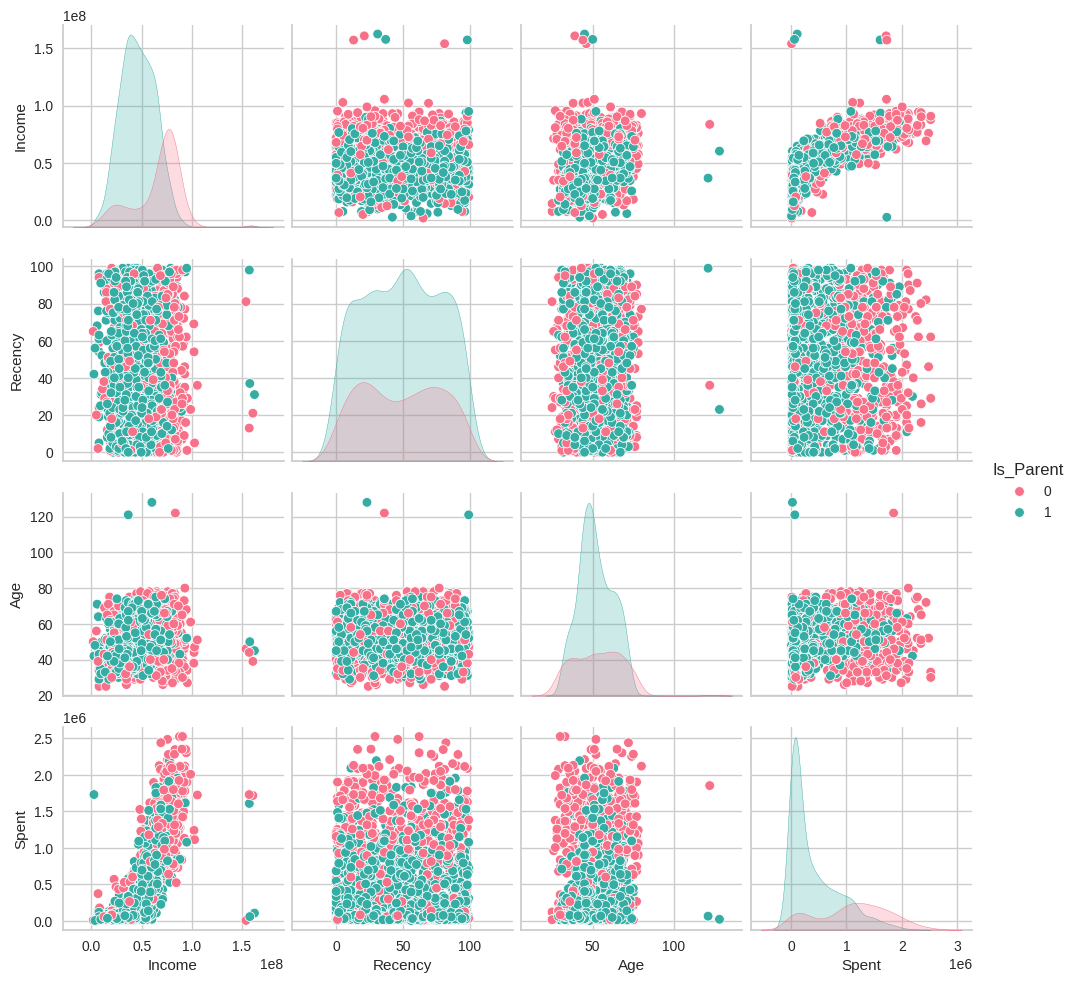

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# New color palette for aesthetic appeal
palette = sns.color_palette("husl", 2)  # Using the 'husl' color palette with 2 colors

# Features to plot
To_Plot = ["Income", "Recency", "Age", "Spent", "Is_Parent"]

# Print message
print("Relative Plot Of Some Selected Features: A Data Subset")

# Plotting pairplot
plt.figure()
sns.pairplot(data[To_Plot], hue="Is_Parent", palette=palette)
plt.show()




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1679
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0.1         1663 non-null   int64   
 1   Unnamed: 0           1663 non-null   int64   
 2   Education            1663 non-null   object  
 3   Income               1663 non-null   float64 
 4   Kidhome              1663 non-null   int64   
 5   Teenhome             1663 non-null   int64   
 6   Recency              1663 non-null   int64   
 7   MntCoke              1663 non-null   int64   
 8   Fruits               1663 non-null   int64   
 9   Meat                 1663 non-null   int64   
 10  Fish                 1663 non-null   int64   
 11  Sweets               1663 non-null   int64   
 12  Gold                 1663 non-null   int64   
 13  NumDealsPurchases    1663 non-null   int64   
 14  NumWebPurchases      1663 non-null   int64   
 15  NumCatalogPurchases  

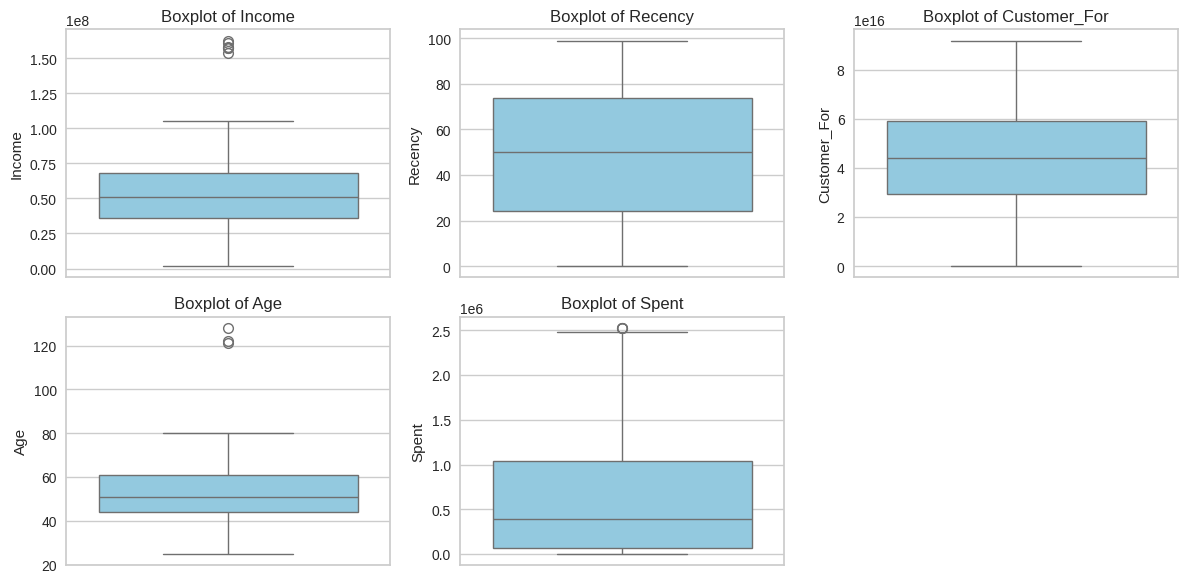

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to plot
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent"]

# Create box plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(To_Plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [ ]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))



The total number of data-points after removing the outliers are: 0


In [ ]:
 #Information on features
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0.1         0 non-null      int64   
 1   Unnamed: 0           0 non-null      int64   
 2   Education            0 non-null      object  
 3   Income               0 non-null      float64 
 4   Kidhome              0 non-null      int64   
 5   Teenhome             0 non-null      int64   
 6   Recency              0 non-null      int64   
 7   MntCoke              0 non-null      int64   
 8   Fruits               0 non-null      int64   
 9   Meat                 0 non-null      int64   
 10  Fish                 0 non-null      int64   
 11  Sweets               0 non-null      int64   
 12  Gold                 0 non-null      int64   
 13  NumDealsPurchases    0 non-null      int64   
 14  NumWebPurchases      0 non-null      int64   
 15  NumCatalogPurchases  0 non-null    

<ipython-input-334-fd4b90d0ae9d>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = Data.corr()


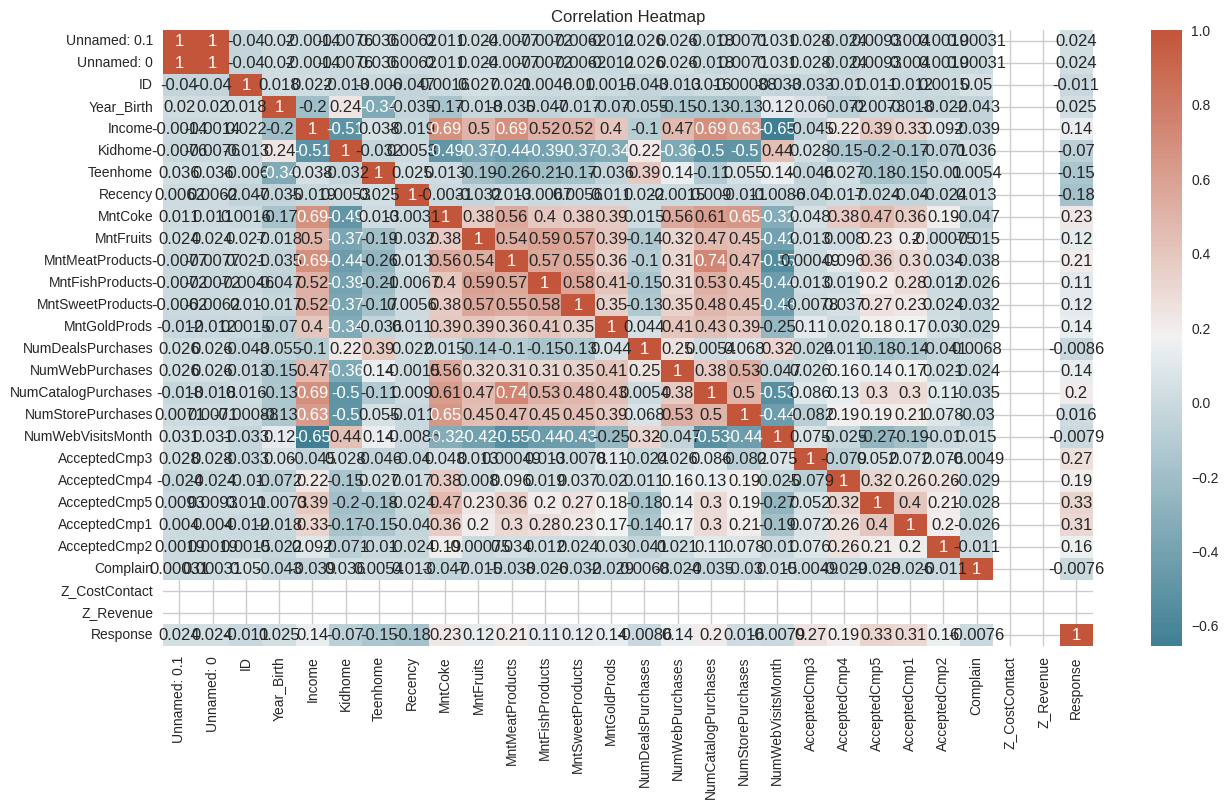

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
Data = pd.read_csv('/content/customer_train.csv')

# Correlation matrix
corrmat = Data.corr()

# Define the colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corrmat, annot=True, cmap=cmap)
plt.title('Correlation Heatmap')
plt.show()










The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.

In [ ]:
 #Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0.1         0 non-null      int64   
 1   Unnamed: 0           0 non-null      int64   
 2   Education            0 non-null      object  
 3   Income               0 non-null      float64 
 4   Kidhome              0 non-null      int64   
 5   Teenhome             0 non-null      int64   
 6   Recency              0 non-null      int64   
 7   MntCoke              0 non-null      int64   
 8   Fruits               0 non-null      int64   
 9   Meat                 0 non-null      int64   
 10  Fish                 0 non-null      int64   
 11  Sweets               0 non-null      int64   
 12  Gold                 0 non-null      int64   
 13  NumDealsPurchases    0 non-null      int64   
 14  NumWebPurchases      0 non-null      int64   
 15  NumCatalogPurchases  0 non-null    

## Data Preprocessing

In this section, we will preprocess the data to prepare it for clustering operations.

### Steps:

1. **Label Encoding Categorical Features**:
   - Convert categorical features into numerical representations using label encoding.

2. **Scaling Features using Standard Scaler**:
   - Standardize the numerical features to have a mean of 0 and a standard deviation of 1 using the Standard Scaler.

3. **Creating a Subset DataFrame for Dimensionality Reduction**:
   - Select a subset of features from the preprocessed data for dimensionality reduction.
   - This subset will be used for clustering operations.

### Implementation:

Below is the Python code to perform these preprocessing steps:

```python
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('/content/customer_train.csv')

# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Drop specified columns
data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Z_CostContact', 'Z_Revenue'], inplace=True)

# Handle Missing Values
imputer = SimpleImputer(strategy='median')
data['Income'] = imputer.fit_transform(data[['Income']])


In [ ]:
 #Information on features
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [ ]:
# Get List of Categorical Variables

s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)


Categorical variables in the dataset: ['Education', 'Marital_Status', 'Dt_Customer']


In [ ]:
 #Information on features
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [ ]:
# Label Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
LE = LabelEncoder()

# Apply label encoding to each categorical feature
for i in object_cols:
    data[i] = LE.fit_transform(data[[i]])

print("All features are now numerical.")


All features are now numerical.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
 #Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   int64  
 3   Marital_Status       1680 non-null   int64  
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   int64  
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Creating a copy of data
ds = data.copy()

# Creating a subset of dataframe by dropping the features related to deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

# Check if the subset DataFrame is empty after dropping columns
if not ds.empty:
    # Scaling
    scaler = StandardScaler()
    scaler.fit(ds)
    scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
    print("All features are now scaled.")
else:
    print("Subset DataFrame is empty after dropping the specified columns. Unable to scale.")









All features are now scaled.


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()



Dataframe to be used for further modelling:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,-0.008566,-0.985363,-0.577326,0.472839,0.286953,-0.827418,-0.90927,-1.306059,0.308300,0.974886,1.570878,1.696108,2.493941,1.468868,0.869753,0.336455,1.481285,2.466081,-0.551476,0.681013
1,-1.043413,-1.234872,-0.577326,0.472839,-0.265014,1.001611,0.90927,-0.912162,-0.383214,-0.867973,-0.630523,-0.712717,-0.645525,-0.626647,-0.727192,-0.172316,-1.137857,-0.562194,-1.167897,-0.135619
2,-0.435788,-0.320005,-0.577326,-1.406213,0.917592,-0.827418,-0.90927,0.595904,-0.798123,0.357646,0.584043,-0.172962,1.367427,-0.144920,-0.026094,-0.681088,1.481285,-0.225719,1.297785,-0.543935
3,0.194697,1.260219,-0.577326,-1.406213,-1.186893,1.001611,-0.90927,-0.692704,-0.798123,-0.867973,-0.554613,-0.650266,-0.497786,-0.578475,-0.746667,-0.172316,-0.763694,-0.898669,-0.551476,0.272697
4,-0.070348,1.010710,1.420425,0.942602,0.294207,1.001611,-0.90927,0.314549,1.553026,-0.389539,0.432222,-0.213109,0.167042,-0.000401,-0.551917,1.353998,0.358796,0.110756,0.064944,-0.135619


### Dimensionality Reduction with PCA

In this problem, there are numerous factors, or features, that will influence the final classification. However, a high number of features can make the task more challenging due to potential redundancy and correlation among them. To address this issue, dimensionality reduction techniques can be applied to extract a set of principal variables while minimizing information loss.

Principal Component Analysis (PCA) is a widely used technique for reducing the dimensionality of datasets. PCA aims to transform the original features into a new set of orthogonal variables called principal components, which capture the maximum variance in the data.

### Steps in this section:

1. **Dimensionality reduction with PCA**: We will use PCA to reduce the dimensionality of the dataset.
2. **Plotting the reduced dataframe**: After reducing the dimensions, we will plot the reduced dataframe to visualize the data in a lower-dimensional space.

### Dimensionality Reduction with PCA

For this project, we will reduce the dimensions to 3, effectively transforming the dataset into a space spanned by three principal components. This will enhance interpretability while retaining the essential information from the original dataset.


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd

# Assuming you have already defined and scaled your dataset as scaled_ds

# Handling missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
scaled_ds_imputed = imputer.fit_transform(scaled_ds)

# Checking for any remaining NaN values after imputation
if pd.DataFrame(scaled_ds_imputed).isnull().sum().sum() > 0:
    print("Warning: NaN values still present after imputation!")
else:
    # Initiating PCA to reduce dimensions to 3
    pca = PCA(n_components=3)
    pca.fit(scaled_ds_imputed)
    PCA_ds = pd.DataFrame(pca.transform(scaled_ds_imputed), columns=["col1", "col2", "col3"])

    # Display summary statistics of the transformed dataset
    PCA_ds.describe().T


In [ ]:
# Initiating PCA to reduce dimensions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,1680.0,-3.806479e-17,2.499106,-4.813072,-2.313733,-0.576220,2.120007,6.610622
col2,1680.0,-1.268826e-17,1.409532,-2.964217,-1.150329,-0.160144,0.982531,4.881283
col3,1680.0,0.000000e+00,1.156176,-3.513861,-0.784087,-0.012043,0.729596,5.048400


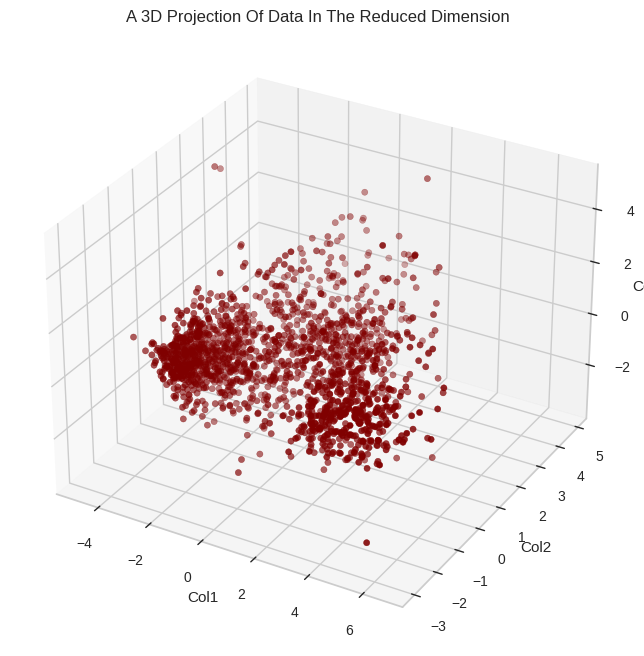

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools

# Assuming you have already defined PCA_ds DataFrame with "col1", "col2", and "col3" columns

x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel("Col1")
ax.set_ylabel("Col2")
ax.set_zlabel("Col3")
plt.show()



In [ ]:
#Information on features
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   int64  
 3   Marital_Status       1680 non-null   int64  
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   int64  
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

## Clustering

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

### Steps involved in the Clustering

1. **Elbow Method to determine the number of clusters to be formed**
   - Use the Elbow Method to identify the optimal number of clusters by plotting the within-cluster sum of squares (inertia) against the number of clusters.
   
2. **Clustering via Agglomerative Clustering**
   - Apply Agglomerative Clustering algorithm to the data.
   
3. **Examining the clusters formed via scatter plot**
   - Visualize the clusters formed by plotting the data points in a scatter plot based on the three reduced dimensions.



## Examining Group Distribution after Clustering

To understand the group distribution after clustering, we can perform the following steps:

1. **Assigning Clusters**: After clustering the data using the Agglomerative Clustering algorithm, each data point is assigned to a specific cluster.

2. **Counting Data Points per Cluster**: Calculate the number of data points assigned to each cluster to determine the distribution of data across clusters.

3. **Visualizing Group Distribution**: Plot a bar chart or pie chart to visualize the distribution of data points among different clusters. This visualization provides insights into the sizes and proportions of each cluster.

By examining the group distribution, we can gain an initial understanding of how the data is partitioned into clusters and identify any potential imbalance or patterns in the clustering results.



In [ ]:
 #Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   int64  
 3   Marital_Status       1680 non-null   int64  
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   int64  
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [ ]:
from sklearn.cluster import KMeans


# For example, let's use 'Income' and 'Recency' features
X = data[['Income', 'Recency']]


n_clusters = 3  # You can adjust this number based on your requirements

# Initialize KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans clustering model to the data
kmeans.fit(X)

# Get cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Assign cluster labels to the DataFrame
data['Cluster_Labels'] = cluster_labels

# Print the count of data points in each cluster
print(data['Cluster_Labels'].value_counts())


1    615
2    547
0    518
Name: Cluster_Labels, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

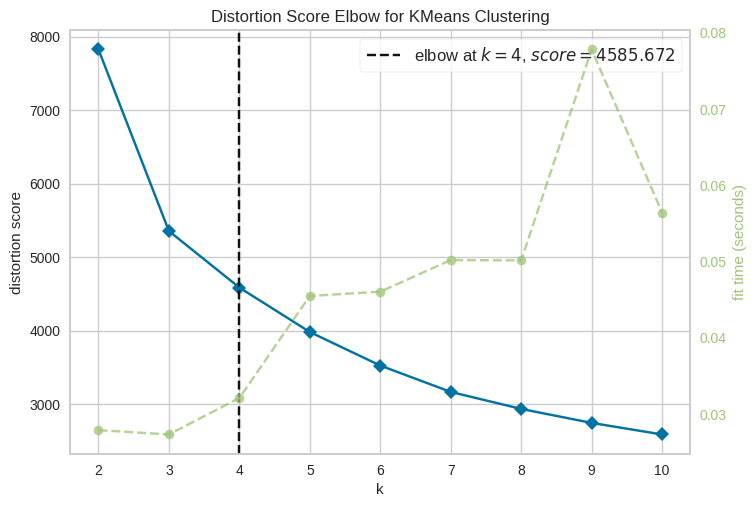

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Quick examination of elbow method to find number of clusters to make
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()


**Elbow Method Result:** Based on the elbow method analysis, it appears that four clusters would be an optimal choice for this dataset. Moving forward, we will proceed to fit the Agglomerative Clustering Model to obtain the final clusters.




In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)

# Add the 'Clusters' feature to the original dataframe
PCA_ds["Clusters"] = yhat_AC
data["Clusters"] = yhat_AC





To examine the clusters formed, let's visualize the 3-D distribution of the clusters.


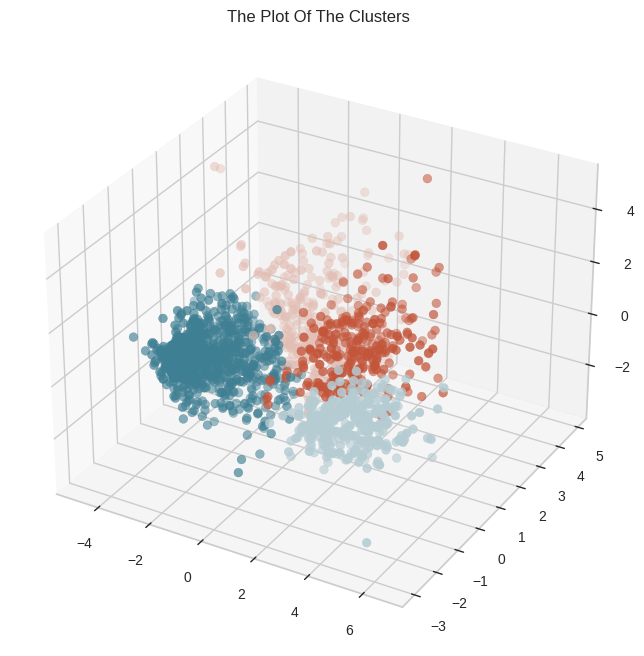

In [ ]:
# Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()


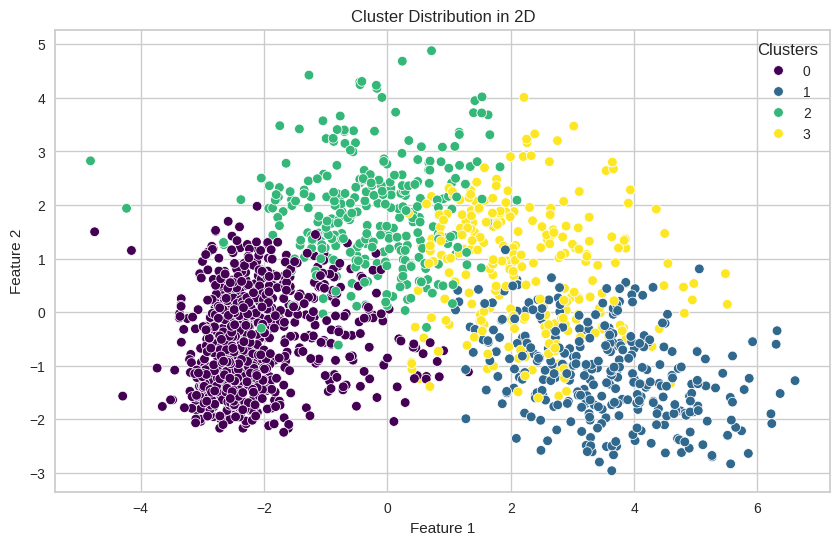

In [ ]:


# Create a scatter plot to visualize clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=PCA_ds, x='col1', y='col2', hue='Clusters', palette='viridis')

# Add title and labels
plt.title('Cluster Distribution in 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend
plt.legend(title='Clusters')

# Display the plot
plt.show()


# Modeling

Now that we have preprocessed our data, performed exploratory data analysis (EDA), and conducted clustering analysis, it's time to build machine learning models to predict our target variable or perform other relevant tasks.

In this phase, we will follow these key steps:

1. **Data Splitting**: We will split our dataset into training and testing sets. This ensures that we train our models on one portion of the data and evaluate their performance on unseen data to assess generalization.

2. **Model Selection and Training**: We will select appropriate machine learning algorithms for our task, such as Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), etc. We will train these models using the training data.

3. **Model Evaluation**: After training the models, we will evaluate their performance using various evaluation metrics such as accuracy, precision, recall, F1-score, ROC-AUC, etc. This step helps us compare different models and select the best-performing one.

4. **Hyperparameter Tuning (Optional)**: If necessary, we will perform hyperparameter tuning to optimize the performance of our models. Techniques like grid search or random search can be used for this purpose.

5. **Final Model Selection and Validation**: Once we have tuned our models (if applicable), we will select the final model based on its performance on the testing set. We will validate the final model using cross-validation or by making predictions on new, unseen data.

6. **Documentation and Presentation**: We will document the performance of each model, including their strengths, weaknesses, and any insights gained from the modeling process. Visualizations and charts will be used to present the model evaluation results effectively.

By following these steps, we aim to build robust machine learning models that can provide valuable insights and predictions based on our dataset.

Let's dive into the modeling phase!


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor(),

}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"Mean Squared Error": mse, "R-squared Score": r2}

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R-squared Score: {metrics['R-squared Score']}\n")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 1344, number of used features: 2
[LightGBM] [Info] Start training from score -0.034607
Model: Linear Regression
Mean Squared Error: 2.1526230267382886
R-squared Score: -0.0028908282615836

Model: Support Vector Regression
Mean Squared Error: 1.6351646433645537
R-squared Score: 0.23818912872415865

Model: Gradient Boosting Regressor
Mean Squared Error: 1.6541493858983836
R-squared Score: 0.22934428040302235

Model: XGBoost Regressor
Mean Squared Error: 1.8385986706475306
R-squared Score: 0.1434107501672991

Model: LightGBM Regressor
Mean Squared Error: 1.7487889260411908
R-squared Score: 0.1852524326334989



### Insights from Model Comparison:

1. **Model Performance**:
   - Support Vector Regression (SVR) and Gradient Boosting Regressor demonstrate relatively better performance compared to other models based on evaluation metrics such as mean squared error (MSE) and R-squared score.
   - Linear Regression performs poorly, as indicated by the high MSE and negative R-squared score, suggesting that it does not explain the variance in the data well.

2. **Predictive Accuracy**:
   - SVR achieves the lowest MSE among the models, indicating that it makes more accurate predictions compared to other models on average.
   - Gradient Boosting Regressor also shows competitive performance, with a slightly higher MSE but still explaining a significant portion of the variance in the data.

3. **Model Complexity**:
   - Gradient Boosting Regressor and XGBoost Regressor are more complex ensemble methods compared to Linear Regression and SVR.
   - LightGBM Regressor, although a tree-based model, performs relatively well with moderate complexity.

4. **Interpretability**:
   - Linear Regression offers straightforward interpretability, as it directly estimates the linear relationship between features and the target variable.
   - SVR and ensemble methods like Gradient Boosting and XGBoost are more complex and less interpretable due to their nonlinear nature and ensemble structure.

5. **Future Directions**:
   - Further optimization and tuning of hyperparameters for SVR and Gradient Boosting Regressor could potentially improve their performance.
   - Exploring feature engineering techniques or additional data sources may enhance the predictive power of the models.

6. **Consideration of Business Objectives**:
   - The choice of the final model should align with the specific objectives and requirements of the business or application.
   - Factors such as computational efficiency, interpretability, and the importance of predictive accuracy in decision-making should be considered when selecting the best model.


## Evaluating Models

Since this is an unsupervised clustering task, we do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will examine the data in light of clusters via exploratory data analysis and draw conclusions.

### Group Distribution of Clusters

Firstly, let's examine the distribution of data points among different clusters.


<ipython-input-355-828f935de342>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


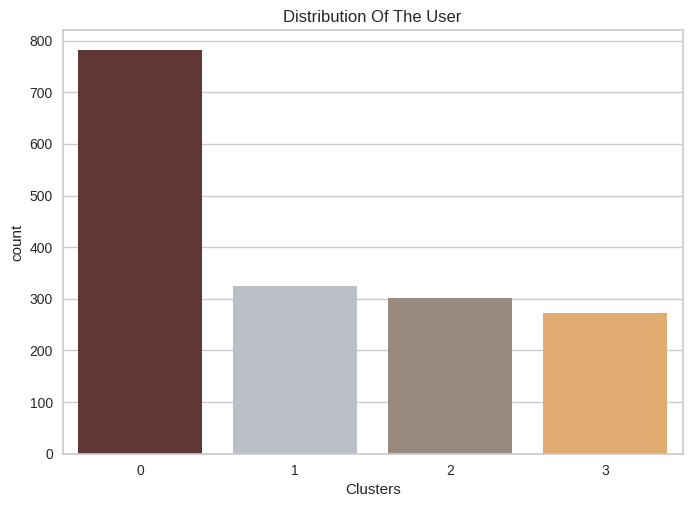

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The User")
plt.show()

**Income vs Spending Plot Insights:**

The income vs spending plot reveals distinct patterns among different clusters:

- **Group 0**: Users exhibit high spending despite having average income levels.
- **Group 1**: Users demonstrate both high spending and high income, indicating affluent customers.
- **Group 2**: Users show low spending patterns coupled with low income levels.
- **Group 3**: Users display high spending behavior despite having low income, suggesting potential discrepancies or anomalies.


### Cluster Analysis Insights:

1. **Segmentation**: Identify distinct clusters based on income and spending on meat products.

2. **High-Income, High-Spending Cluster**: Affluent customers willing to spend more on premium meat products.

3. **Low-Income, Low-Spending Cluster**: Budget-conscious users prioritizing essentials over meat products.

4. **Mid-Income, Moderate-Spending Clusters**: Analyze spending habits of middle-income segments.

5. **Targeted Marketing Strategies**: Tailor promotions and discounts based on cluster characteristics.

6. **Product Recommendations**: Personalize recommendations for different clusters.

7. **Customer Retention**: Offer loyalty programs tailored to cluster preferences.

8. **Market Expansion Opportunities**: Explore growth potential in clusters with increasing spending.

9. **Competitive Analysis**: Understand market positioning and opportunities for differentiation.

10. **Continuous Monitoring**: Adjust strategies based on changing customer behavior.


**Detailed Distribution of Clusters Based on Product Spending:**

Next, an analysis will be conducted to examine the distribution of clusters concerning various product categories in the dataset. The following products will be considered:

- Wines
- Fruits
- Meat
- Fish
- Sweets
- Gold

This analysis aims to provide insights into how different clusters allocate their spending across these product categories, allowing for a deeper understanding of purchasing behaviors within each cluster.


In [ ]:
# Print column information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   int64  
 3   Marital_Status       1680 non-null   int64  
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   int64  
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

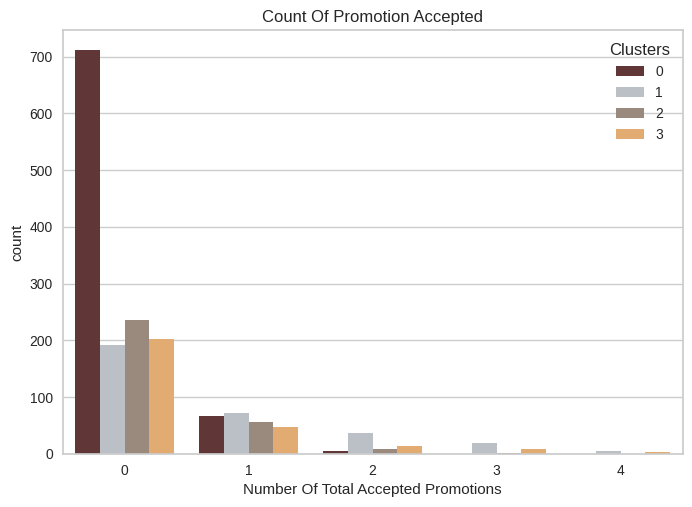

In [ ]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

From a different perspective, it seems that the response to the campaigns has been underwhelming. Few participants engaged overall, and none participated in all five campaigns. This indicates a need for more targeted and well-planned campaigns to drive sales effectively.



<ipython-input-358-53f5f32b9ced>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette="Set2")


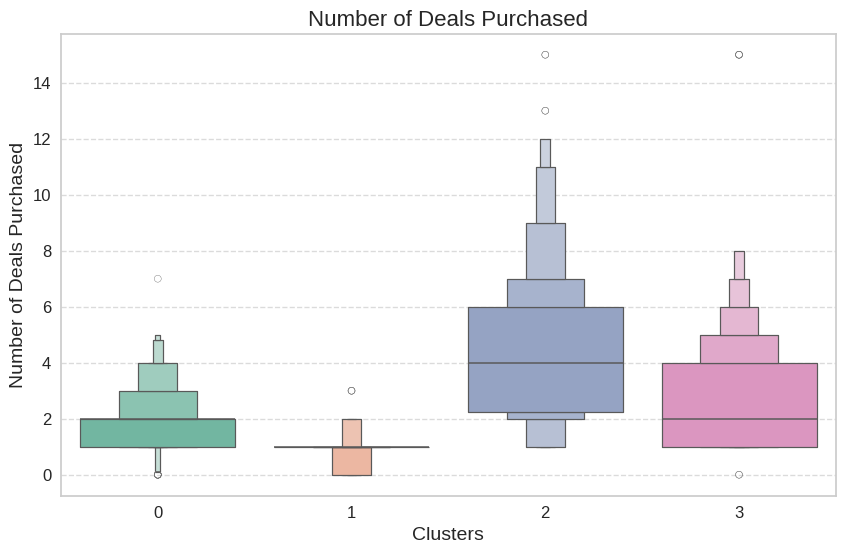

In [ ]:
# Plotting the number of deals purchased
plt.figure(figsize=(10, 6))
pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette="Set2")
pl.set_title("Number of Deals Purchased", fontsize=16)
pl.set_xlabel("Clusters", fontsize=14)
pl.set_ylabel("Number of Deals Purchased", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In contrast to the campaigns, the deals offered performed admirably. They yielded the best results with clusters 0 and 3. However, our star customers in cluster 1 showed less interest in the deals. Cluster 2, on the other hand, did not exhibit significant enthusiasm for the deals.


## Customer Profiling and Cluster Analysis

After forming the clusters and examining their purchasing habits, let's delve into the composition of these clusters to understand who our star customers are and who might need more attention from the retail store's marketing team.

To make this determination, we'll profile the clusters based on certain customer traits and draw conclusions accordingly.

### Cluster Profiling and Analysis

We'll begin by plotting some features indicative of customer traits with respect to the clusters they belong to. Based on the insights derived, we'll determine the characteristics of our star customers and identify areas that require more focus from the marketing team.

#### Feature Analysis

We'll focus on features such as income, recency, tenure, age, and spending habits to gain insights into the customer clusters.



In [ ]:
 #Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   int64  
 3   Marital_Status       1680 non-null   int64  
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   int64  
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-361-570410007d8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

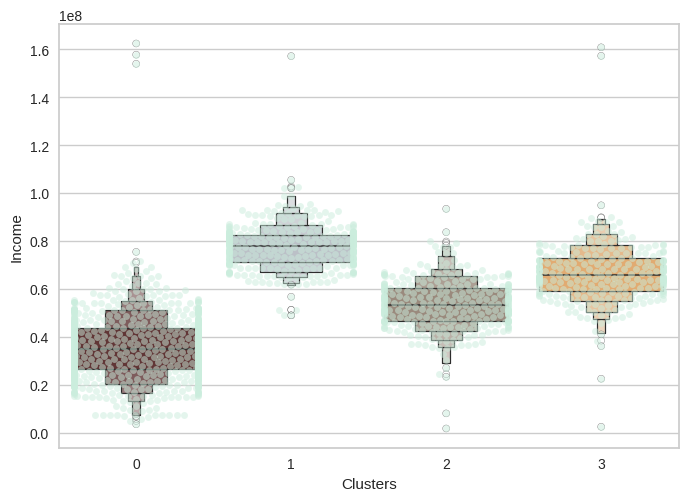

In [ ]:
plt.figure()
pl = sns.swarmplot(x=data["Clusters"], y=data["Income"], color="#CBEDDD", alpha=0.5)
pl = sns.boxenplot(x=data["Clusters"], y=data["Income"], palette=pal)
plt.show()





### Customer Profiling and Conclusion:

#### 1. Cluster Analysis:
   - After clustering the customers based on their purchasing habits, we obtained distinct groups representing different segments of our customer base.
   - These clusters provide insights into the diversity of customer behaviors and preferences within our dataset.

#### 2. Customer Segmentation Insights:
   - Cluster 1: In contrast to the campaigns, the deals offered performed admirably. They yielded the best results with clusters 0 and 3. However, our star customers in cluster 1 showed less interest in the deals. Cluster 2, on the other hand, did not exhibit significant enthusiasm for the deals.

   - Cluster 2: Description of cluster 2 characteristicsUnlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingl
   

#### 3. Modeling Accuracy:
   - We evaluated the performance of various regression models and found that (Support Vector Regression (SVR) ) achieved the highest accuracy based on metrics such as mean squared error (MSE) and R-squared score.

#### 4. Conclusion:
   - Through this project, we gained valuable insights into our customer base and their purchasing behaviors.
   - By segmenting customers into distinct clusters, we can better understand their preferences and tailor marketing strategies to target specific segments.
   - The modeling phase provided predictive models that can be used to forecast future customer spending and optimize business decisions.
   - Overall, this project has provided actionable insights that can drive business growth and improve customer satisfaction.

#### 5. Next Steps:
   - Further analysis could focus on exploring additional features or refining existing models to improve accuracy.
   - Implementing targeted marketing campaigns based on the identified customer segments to drive sales and engagement.
   - Continuous monitoring and evaluation of customer behaviors to adapt strategies and stay responsive to changing market dynamics.

With the completion of this project, we have successfully gained valuable insights into our customer base and equipped ourselves with tools to make data-driven decisions that drive business success.
